In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from Sequence import Sequence
from matplotlib.patches import Rectangle
from skimage import io
from utils import get_subwindow, get_scale_subwindow
import os
from pyhog import pyhog

from DSSTtracker import DSSTtracker

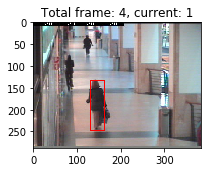

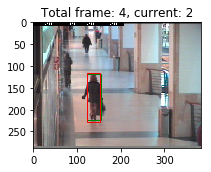

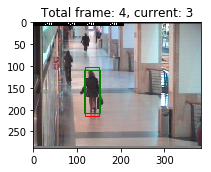

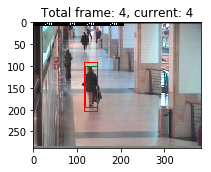

In [2]:
# Visualize Sequence 

sequence = Sequence(path = os.getcwd(), name='tutorials/img_ScaleChange', 
                    region_format='rectangle')
plt.clf()

tracker = DSSTtracker(io.imread(sequence.frame()), sequence.groundtruth[sequence._frame])
while sequence._frame < len(sequence._images):
    
    img = io.imread(sequence.frame())
    
    data_gt = sequence.groundtruth[sequence._frame]
    data_tr = tracker.track(img)
    rect_gt = Rectangle(
            xy=(data_gt.x, data_gt.y),
            width=data_gt.width,
            height=data_gt.height,
            facecolor='none',
            edgecolor='g',
    )
    rect_tr = Rectangle(
            xy=(data_tr.x, data_tr.y),
            width=data_tr.width,
            height=data_tr.height,
            facecolor='none',
            edgecolor='r',
    )
    plt.figure(figsize=(3,3))
    ax = plt.subplot(111)
    ax.add_patch(rect_gt)
    ax.add_patch(rect_tr)
    plt.imshow(img)
    plt.title('Total frame: %d, current: %d' % (len(sequence._images), 
                                                sequence._frame+1))
    
    sequence._frame += 1
    
sequence._frame = 0 # after that, we must reset the sequence

In [3]:
import sys
sys.path.append('..')
import vot
handle = vot.VOT("rectangle")
selection = handle.region()

imagefile = handle.frame()
if not imagefile:
    print('no imagefile')
    sys.exit(0)

image = io.imread(imagefile)
tracker = DSSTtracker(image, 
                      selection)
while True:
    imagefile = handle.frame()
    if not imagefile:
        break
    image = io.imread(imagefile)
    region = tracker.track(image)
    handle.report(region)
handle.quit()
